# How to create points datasets (XVPCA)

In [1]:
from nes import *
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline

## 1. Collect data

We have two dataframes: the first one gives us the PM10 data per hour at some stations, and the second one gives us extra information about stations in Catalonia (codes, locations and area classifications)

### PM10 data

In [3]:
path = '/gpfs/projects/bsc32/models/NES_tutorial_data/Dades_2017.xlsx'
df_pm10 = pd.read_excel(path)
df_pm10

,Estació,PM10 Barcelona (Eixample),PM10 Badalona (guàrdia urbana),PM10 Badalona (Assamblea de Catalunya),PM10 Barcelona (Pl. de la Universitat),PM10 Barcelona (Poblenou),PM10 Barcelona (Zona Universitària),PM10 Barcelona (el Port Vell),PM10 Barcelona (IES Goya),PM10 Barcelona (IES Verdaguer),...,PM10 Constantí (Gaudí),PM10 Vila-seca (RENFE),PM10 Sitges (Vallcarca-oficines),PM10 Sant Vicenç dels Horts (Àlaba),PM10 Montsec (OAM),PM10 Montseny (la Castanya),PM10 Caldes de Montbui (Ajuntament),PM10 Sant Feliu de Llobregat (Eugeni d'Ors),PM 10 La Seu d'Urgell (CC Les Monges),PM10 Vic (Centre Cívic Santa Anna)
0,Codi europeu,ES1438A,ES1928A,ES2027A,ES0559A,ES0691A,ES0567A,ES1870A,ES1852A,ES1900A,...,ES1123A,ES1117A,ES2033A,ES2011A,ES1982A,ES1778A,ES1680A,ES1362A,ES9994A,ES1874A
1,Dia,Valor (µg/m3),Valor (µg/m3),Valor (µg/m3),Valor (µg/m3),Valor (µg/m3),Valor (µg/m3),Valor (µg/m3),Valor (µg/m3),Valor (µg/m3),...,Valor (µg/m3),Valor (µg/m3),Valor (µg/m3),Valor (µg/m3),Valor (µg/m3),Valor (µg/m3),Valor (µg/m3),Valor (µg/m3),Valor (µg/m3),Valor (µg/m3)
2,2017-01-01 00:00:00,19.6,NaN,20,20.2,25.6,16.5,29,NaN,23.8,...,12.97,NaN,11,22.49,9.500299,7.936455,NaN,NaN,NaN,NaN
3,2017-01-02 00:00:00,27.2,20.86,23,31.6,35,22.8,28,17.2,32.4,...,NaN,25.38,26,25.39,1.829618,9.787004,32,22.06,NaN,NaN
4,2017-01-03 00:00:00,35.7,NaN,32,37,36.2,30.9,31,NaN,35.8,...,21.8,36.49,48,30.65,8.094607,16.97829,43,35.84,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2017-12-27 00:00:00,17.5,7.59,10,16.9,14,13.1,21,NaN,20.8,...,12,22.95,NaN,NaN,1,3.066751,NaN,10.3,NaN,NaN
363,2017-12-28 00:00:00,17,NaN,14,17.9,15,NaN,13,14.5,16,...,NaN,6.5,NaN,9.976,1,3.351872,NaN,26.81,NaN,NaN
364,2017-12-29 00:00:00,24.6,21,24,23.2,25.8,15.3,21,NaN,25.9,...,8.86,9.56,NaN,23.76,1,4.219732,NaN,14.09,NaN,NaN
365,2017-12-30 00:00:00,27.4,NaN,15,22.3,16.6,11.2,16,10.7,18.8,...,NaN,NaN,NaN,19.04,1.091187,4.713029,NaN,NaN,NaN,NaN


In [4]:
df_pm10 = df_pm10.set_index('Estació')
df_pm10.iloc[1] = df_pm10.columns
df_pm10.columns = df_pm10.iloc[0]
df_pm10 = df_pm10[1:]

In [5]:
df_pm10

Codi europeu,ES1438A,ES1928A,ES2027A,ES0559A,ES0691A,ES0567A,ES1870A,ES1852A,ES1900A,ES1843A,...,ES1123A,ES1117A,ES2033A,ES2011A,ES1982A,ES1778A,ES1680A,ES1362A,ES9994A,ES1874A
Estació,,,,,,,,,,,,,,,,,,,,,
Dia,PM10 Barcelona (Eixample),PM10 Badalona (guàrdia urbana),PM10 Badalona (Assamblea de Catalunya),PM10 Barcelona (Pl. de la Universitat),PM10 Barcelona (Poblenou),PM10 Barcelona (Zona Universitària),PM10 Barcelona (el Port Vell),PM10 Barcelona (IES Goya),PM10 Barcelona (IES Verdaguer),PM10 Berga (IES Guillem de Berguedà),...,PM10 Constantí (Gaudí),PM10 Vila-seca (RENFE),PM10 Sitges (Vallcarca-oficines),PM10 Sant Vicenç dels Horts (Àlaba),PM10 Montsec (OAM),PM10 Montseny (la Castanya),PM10 Caldes de Montbui (Ajuntament),PM10 Sant Feliu de Llobregat (Eugeni d'Ors),PM 10 La Seu d'Urgell (CC Les Monges),PM10 Vic (Centre Cívic Santa Anna)
2017-01-01 00:00:00,19.6,NaN,20,20.2,25.6,16.5,29,NaN,23.8,NaN,...,12.97,NaN,11,22.49,9.500299,7.936455,NaN,NaN,NaN,NaN
2017-01-02 00:00:00,27.2,20.86,23,31.6,35,22.8,28,17.2,32.4,NaN,...,NaN,25.38,26,25.39,1.829618,9.787004,32,22.06,NaN,NaN
2017-01-03 00:00:00,35.7,NaN,32,37,36.2,30.9,31,NaN,35.8,NaN,...,21.8,36.49,48,30.65,8.094607,16.97829,43,35.84,NaN,NaN
2017-01-04 00:00:00,30.9,34.49,35,32,39.3,26.8,32,30.3,39.4,NaN,...,29.17,34.33,47,39.54,4.377368,12.56556,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27 00:00:00,17.5,7.59,10,16.9,14,13.1,21,NaN,20.8,NaN,...,12,22.95,NaN,NaN,1,3.066751,NaN,10.3,NaN,NaN
2017-12-28 00:00:00,17,NaN,14,17.9,15,NaN,13,14.5,16,NaN,...,NaN,6.5,NaN,9.976,1,3.351872,NaN,26.81,NaN,NaN
2017-12-29 00:00:00,24.6,21,24,23.2,25.8,15.3,21,NaN,25.9,NaN,...,8.86,9.56,NaN,23.76,1,4.219732,NaN,14.09,NaN,NaN


### Stations information

In [6]:
path = '/gpfs/projects/bsc32/models/NES_tutorial_data/XVPCA_info.csv'
df_stations = pd.read_csv(path)
df_stations

,station.code,lat,lon,standardised_network_provided_area_classification
0,ES0266A,41.379322,2.086140,urban-centre
1,ES0392A,41.727704,1.838531,urban-suburban
2,ES0395A,41.567824,2.014598,urban-centre
3,ES0559A,41.387424,2.164918,urban-centre
4,ES0567A,41.384906,2.119574,urban-centre
...,...,...,...,...
129,ES2087A,41.929283,2.257302,NaN
130,ES2091A,40.579900,0.553500,NaN
131,ES2088A,41.771060,2.250647,NaN
132,ES1908A,41.239069,1.856564,NaN


### Relevant stations information

We combine both datasets to get the coordinates of the stations for which we have PM10 data

In [7]:
df_pm10 = df_pm10.reindex(columns=list(df_stations['station.code']))
df_pm10

Codi europeu,ES0266A,ES0392A,ES0395A,ES0559A,ES0567A,ES0584A,ES0586A,ES0691A,ES0692A,ES0694A,...,ES2090A,ES0554A,ES0977A,ES1398A,ES1200A,ES2087A,ES2091A,ES2088A,ES1908A,ES9994A
Estació,,,,,,,,,,,,,,,,,,,,,
Dia,PM10 Esplugues de Llobregat (CEIP Isidre Martí),PM10 Manresa (CEIP La Font),NaN,PM10 Barcelona (Pl. de la Universitat),PM10 Barcelona (Zona Universitària),NaN,PM10 Molins de Rei (Ajuntament),PM10 Barcelona (Poblenou),NaN,NaN,...,NaN,NaN,PM10 L'Arboç (CEIP Sant Julià),NaN,NaN,NaN,NaN,NaN,NaN,PM 10 La Seu d'Urgell (CC Les Monges)
2017-01-01 00:00:00,NaN,NaN,NaN,20.2,16.5,NaN,NaN,25.6,NaN,NaN,...,NaN,NaN,29.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-02 00:00:00,NaN,NaN,NaN,31.6,22.8,NaN,23.82,35,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03 00:00:00,NaN,27.63,NaN,37,30.9,NaN,36.07,36.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04 00:00:00,NaN,NaN,NaN,32,26.8,NaN,29.59,39.3,NaN,NaN,...,NaN,NaN,28.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27 00:00:00,NaN,NaN,NaN,16.9,13.1,NaN,6.63,14,NaN,NaN,...,NaN,NaN,18.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-28 00:00:00,NaN,11.91,NaN,17.9,NaN,NaN,22.56,15,NaN,NaN,...,NaN,NaN,2.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-29 00:00:00,NaN,NaN,NaN,23.2,15.3,NaN,16.12,25.8,NaN,NaN,...,NaN,NaN,8.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Create dataset

### Define coordinates

To create a points dataset, we need to give the coordinates (`lat`, `lon` and `time`)

In [8]:
times = df_pm10.index[1:]
lat = df_stations['lat']
lon = df_stations['lon']

In [9]:
nessy = create_nes(comm=None, info=False, projection=None, parallel_method='X', lat=lat, lon=lon, times=times)

### Add data

In [10]:
variables = {'station_name': {'data': df_pm10.iloc[0].str.replace('PM10 ', '').str.replace('PM 10 ', '').to_numpy(),
                              'dimensions': ('station',),
                              'dtype': str},
            'station_code': {'data': df_pm10.columns,
                             'dimensions': ('station',),
                             'dtype': str},
            'area_classification': {'data': df_stations['standardised_network_provided_area_classification'],
                                    'dimensions': ('station',),
                                    'dtype': str},
            'pm10': {'data': df_pm10.iloc[1:, :].to_numpy(),
                     'dimensions': ('time', 'station',),
                     'dtype': float}}

In [11]:
nessy.variables = variables

## 2. Plot

In [12]:
nessy.create_shapefile()

,geometry
FID,
0,POINT (2.08614 41.37932)
1,POINT (1.83853 41.72770)
2,POINT (2.01460 41.56782)
3,POINT (2.16492 41.38742)
4,POINT (2.11957 41.38491)
...,...
129,POINT (2.25730 41.92928)
130,POINT (0.55350 40.57990)
131,POINT (2.25065 41.77106)


In [13]:
nessy.shapefile['station_code'] = nessy.variables['station_code']['data']
nessy.shapefile['area_classification'] = nessy.variables['area_classification']['data']
nessy.shapefile['pm10'] = pd.to_numeric(nessy.variables['pm10']['data'][0, :]) # Transform from object to float
nessy.shapefile

,geometry,station_code,area_classification,pm10
FID,,,,
0,POINT (2.08614 41.37932),ES0266A,urban-centre,NaN
1,POINT (1.83853 41.72770),ES0392A,urban-suburban,NaN
2,POINT (2.01460 41.56782),ES0395A,urban-centre,NaN
3,POINT (2.16492 41.38742),ES0559A,urban-centre,20.2
4,POINT (2.11957 41.38491),ES0567A,urban-centre,16.5
...,...,...,...,...
129,POINT (2.25730 41.92928),ES2087A,NaN,NaN
130,POINT (0.55350 40.57990),ES2091A,NaN,NaN
131,POINT (2.25065 41.77106),ES2088A,NaN,NaN


### PM10

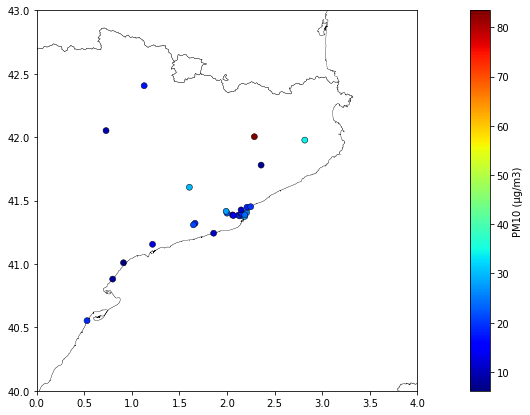

In [14]:
fig, ax = plt.subplots(1, figsize=(19, 7))
ax.set_xlim([0, 4])
ax.set_ylim([40, 43])
countries = gpd.read_file('/gpfs/projects/bsc32/models/NES_tutorial_data/gadm_country_mask/gadm_country_ISO3166.shp')
countries.plot(ax=ax, facecolor="none", edgecolor='black', linewidth=0.3)
nessy.shapefile.plot(ax=ax, column='pm10', cmap='jet', edgecolor='black', linewidth=0.5, legend=True,
                     legend_kwds={'label': 'PM10 (µg/m3)'})
ax.margins(0)

### Area classification

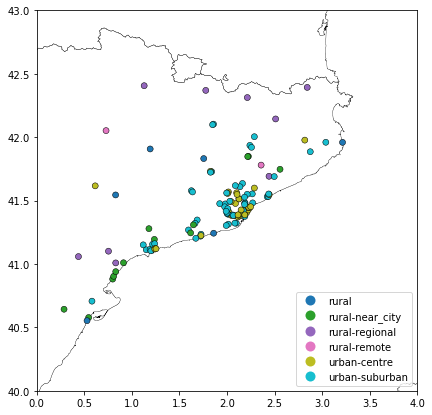

In [15]:
fig, ax = plt.subplots(1, figsize=(19, 7))
ax.set_xlim([0, 4])
ax.set_ylim([40, 43])
countries.plot(ax=ax, facecolor="none", edgecolor='black', linewidth=0.3)
nessy.shapefile.plot(ax=ax, column='area_classification', edgecolor='black', linewidth=0.5, legend=True,
                     legend_kwds={'loc': 'lower right'})
ax.margins(0)

## 3. Write dataset

When we want to write files that contain strings data, we need to set the maximum string length (`strlen`) that our strings can have

In [16]:
nessy.set_strlen(75)

In [17]:
nessy.to_netcdf('points_XVPCA_info.nc', info=True)

/esarchive/scratch/avilanova/software/NES/nes/nc_projections/points_nes.py:357: UserWarning: WARNING!!! Different data types for variable station_name. Input dtype=<class 'str'>. Data dtype=object.
  warnings.warn(msg)
/esarchive/scratch/avilanova/software/NES/nes/nc_projections/points_nes.py:357: UserWarning: WARNING!!! Different data types for variable station_code. Input dtype=<class 'str'>. Data dtype=object.
  warnings.warn(msg)
/esarchive/scratch/avilanova/software/NES/nes/nc_projections/points_nes.py:357: UserWarning: WARNING!!! Different data types for variable area_classification. Input dtype=<class 'str'>. Data dtype=object.
  warnings.warn(msg)
/esarchive/scratch/avilanova/software/NES/nes/nc_projections/points_nes.py:357: UserWarning: WARNING!!! Different data types for variable pm10. Input dtype=<class 'float'>. Data dtype=object.
  warnings.warn(msg)


Rank 000: Creating points_XVPCA_info.nc
Rank 000: NetCDF ready to write
Rank 000: Dimensions done
Rank 000: Writing station_name var (1/4)
Rank 000: Var station_name created (1/4)
Rank 000: Filling station_name)
Rank 000: Var station_name data (1/4)
Rank 000: Var station_name completed (1/4)
Rank 000: Writing station_code var (2/4)
Rank 000: Var station_code created (2/4)
Rank 000: Filling station_code)
Rank 000: Var station_code data (2/4)
Rank 000: Var station_code completed (2/4)
Rank 000: Writing area_classification var (3/4)
Rank 000: Var area_classification created (3/4)
Rank 000: Filling area_classification)
Rank 000: Var area_classification data (3/4)
Rank 000: Var area_classification completed (3/4)
Rank 000: Writing pm10 var (4/4)
Rank 000: Var pm10 created (4/4)
Rank 000: Filling pm10)
Rank 000: Var pm10 data (4/4)
Rank 000: Var pm10 completed (4/4)
